In [ ]:
# homogeneiety analysis 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import ks_2samp

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color'] 

In [ ]:
## 1. Fig 3c  ----------------

(5173, 20)
(5272, 20)
(620, 5)
(521, 9)
(521, 5)
(521, 5)
0.007383930248327593


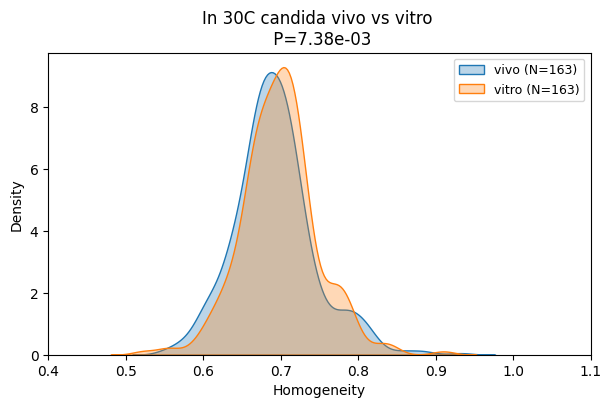

In [6]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'homo_pure_allinfo_vivo.txt', sep='\t')
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure['ACC'] = pd.to_numeric(pure['ACC'], errors='coerce')
pure['window'] = pure['window_start'] + '_' + pure['window_end']
pure['id'] = pure['gene'] + '_' + pure['window']
vivo = pure
vivo['IDD'] = vivo['gene'] + '_' + vivo['condition']
vivo= vivo[vivo['condition'] == '30C']
print(vivo.shape)
aver = vivo.groupby(['condition', 'IDD', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()
vivo = aver
vivo['loc'] = 'vivo'


dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'homo_pure_allinfo_vitro.txt', sep='\t')
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure['ACC'] = pd.to_numeric(pure['ACC'], errors='coerce')
pure['window'] = pure['window_start'] + '_' + pure['window_end']
pure['id'] = pure['gene'] + '_' + pure['window']
vitro = pure
vitro['IDD'] = vitro['gene'] + '_' + vitro['condition']
vitro= vitro[vitro['condition'] == '30C']
print(vitro.shape)
aver = vitro.groupby(['condition', 'IDD', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()
vitro = aver
vitro['loc'] = 'vitro'

df_long_all = pd.concat([vivo,vitro])
df_common_wide = pd.merge(vivo,vitro,how='inner',on=['IDD','IDD'])
print(df_long_all.shape)
print(df_common_wide.shape)

df_common_wide_30C = df_common_wide
### to get the common window 
tmp1 = df_common_wide_30C[[ 'weighted_corr_x', 'condition_x',  'region_x',   'IDD', 'loc_x']]
tmp2 = df_common_wide_30C[[ 'weighted_corr_y', 'condition_y',  'region_y',   'IDD','loc_y']]
print(tmp1.shape)
print(tmp2.shape)


#perform Kolmogorov-Smirnov test
res=ks_2samp(tmp1.weighted_corr_x,tmp2.weighted_corr_y)
p_value=res[1]
print(p_value)

plt.figure(figsize=(7, 4), dpi=100)

sns.kdeplot(tmp1.weighted_corr_x, label="vivo (N=%s)" % (len(tmp1.IDD.unique())), color=colors[0], fill=True,alpha=.3,linewidth=1)
sns.kdeplot(tmp2.weighted_corr_y, label="vitro (N=%s)" % (len(tmp2.IDD.unique())), color=colors[1], fill=True,alpha=.3,linewidth=1)

plt.xlabel("Homogeneity")
plt.legend(loc="upper right", fontsize=9)
plt.xlim(0.4,1.1)
plt.title("In 30C candida vivo vs vitro \n P=7.38e-03")

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3c_30C_vitro_vs_vivo_homo_density_gene_level.pdf',bbox_inches='tight', dpi=300) 

In [ ]:
## 2. Fig 3d  ----------------

(5939, 20)
(3341, 20)
(527, 5)
(368, 9)
(368, 5)
(368, 5)
4.218564370509506e-07


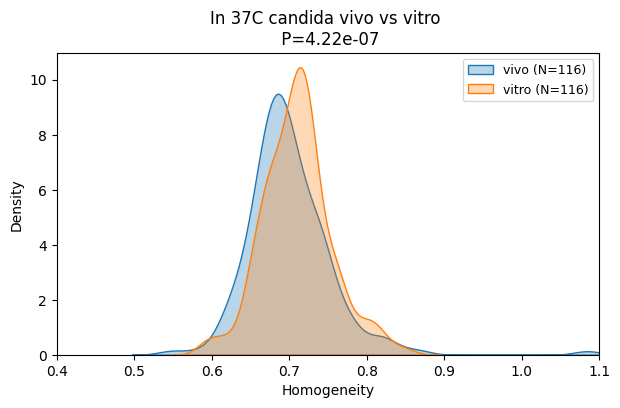

In [7]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'homo_pure_allinfo_vivo.txt', sep='\t')
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure['ACC'] = pd.to_numeric(pure['ACC'], errors='coerce')
pure['window'] = pure['window_start'] + '_' + pure['window_end']
pure['id'] = pure['gene'] + '_' + pure['window']
vivo = pure
vivo['IDD'] = vivo['gene'] + '_' + vivo['condition']
vivo= vivo[vivo['condition'] == '37C']
print(vivo.shape)
aver = vivo.groupby(['condition', 'IDD', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()
vivo = aver
vivo['loc'] = 'vivo'


dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'homo_pure_allinfo_vitro.txt', sep='\t')
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure['ACC'] = pd.to_numeric(pure['ACC'], errors='coerce')
pure['window'] = pure['window_start'] + '_' + pure['window_end']
pure['id'] = pure['gene'] + '_' + pure['window']
vitro = pure
vitro['IDD'] = vitro['gene'] + '_' + vitro['condition']
vitro= vitro[vitro['condition'] == '37C']
print(vitro.shape)
aver = vitro.groupby(['condition', 'IDD', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()
vitro = aver
vitro['loc'] = 'vitro'


df_long_all = pd.concat([vivo,vitro])
df_common_wide = pd.merge(vivo,vitro,how='inner',on=['IDD','IDD'])
print(df_long_all.shape)
print(df_common_wide.shape)



df_common_wide_30C = df_common_wide
### to get the common window 
tmp1 = df_common_wide_30C[[ 'weighted_corr_x', 'condition_x',  'region_x',   'IDD', 'loc_x']]
tmp2 = df_common_wide_30C[[ 'weighted_corr_y', 'condition_y',  'region_y',   'IDD','loc_y']]
print(tmp1.shape)
print(tmp2.shape)


#perform Kolmogorov-Smirnov test
res=ks_2samp(tmp1.weighted_corr_x,tmp2.weighted_corr_y)
p_value=res[1]
print(p_value)

plt.figure(figsize=(7, 4), dpi=100)

sns.kdeplot(tmp1.weighted_corr_x, label="vivo (N=%s)" % (len(tmp1.IDD.unique())), color=colors[0], fill=True,alpha=.3,linewidth=1)
sns.kdeplot(tmp2.weighted_corr_y, label="vitro (N=%s)" % (len(tmp2.IDD.unique())), color=colors[1], fill=True,alpha=.3,linewidth=1)

plt.xlabel("Homogeneity")
plt.legend(loc="upper right", fontsize=9)
plt.xlim(0.4,1.1)
plt.title("In 37C candida vivo vs vitro \n P=4.22e-07")

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3d_37C_vitro_vs_vivo_homo_density_gene_level.pdf',bbox_inches='tight', dpi=300) 